# Kernel/Spline Rregression (with Regularization) for non-linear functions
* Input variable space is constructed using random sampling/cluster pick/uniform sampling
* Linear fit is often inadequate but higher-order polynomial fits often leads to overfitting i.e. learns spurious, flawed relationships between input and output
* R-square fit can often be misleding measure in case of high-dimensional regression
* Metamodel can be constructed by selectively discovering features (or their combination) which matter and shrinking other high-order terms towards zero

### Import libraries

In [618]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Global variables for the program

In [619]:
N_points = 51 # Number of points for constructing function
x_min = 1 # Min of the range of x (feature)
x_max = 10 # Max of the range of x (feature)
noise_mean = 0 # Mean of the Gaussian noise adder
noise_sd = 2 # Std.Dev of the Gaussian noise adder
ridge_alpha = tuple([10**(x) for x in range(-5,2,1) ]) # Alpha (regularization strength) of ridge regression

### Generate feature and output vector following a non-linear function
$$ The\ ground\ truth\ or\ originating\ function\ is\ as\ follows:\  $$
 
$$ y=f(x)= x^2.sin(x).e^{-0.1x}+\psi(x) $$

$$: \psi(x) = {\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}} $$

In [620]:
x_smooth = np.array(np.linspace(x_min,x_max,1001))

In [621]:
# Linearly spaced sample points
X=np.array(np.linspace(x_min,x_max,N_points))

# Samples drawn from uniform random distribution
X_sample = x_min+np.random.rand(N_points)*(x_max-x_min)

In [622]:
def func(x):
    result = x**2*np.sin(x)*np.exp(-(1/x_max)*x)
    return (result)

In [623]:
noise_x = np.random.normal(loc=noise_mean,scale=noise_sd,size=N_points)

In [624]:
y = func(X)+noise_x
y_sampled = func(X_sample)+noise_x

In [625]:
df = pd.DataFrame(data=X,columns=['X'])
df['Ideal y']=df['X'].apply(func)
df['y']=y
df['X_sampled']=X_sample
df['y_sampled']=y_sampled
df.head()

,X,Ideal y,y,X_sampled,y_sampled
0,1.00,0.761394,-1.299032,6.225688,-3.255521
1,1.18,1.144126,1.836013,5.780489,-8.339272
2,1.36,1.578674,0.052565,8.680631,19.898718
3,1.54,2.032142,3.431021,8.385675,27.603195
4,1.72,2.463237,-0.531352,4.010934,-11.223398


### Plot the function(s), both the ideal characteristic and the observed output (with process and observation noise)

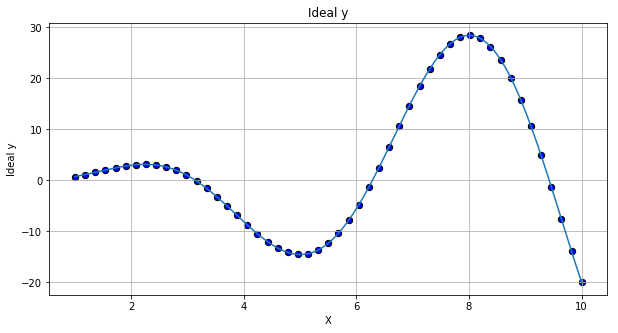

In [626]:
df.plot.scatter('X','Ideal y',title='Ideal y',grid=True,edgecolors=(0,0,0),c='blue',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth))

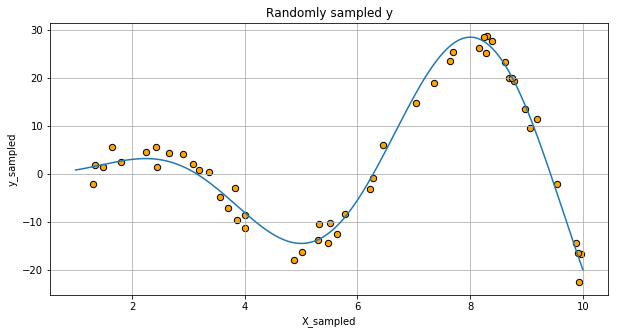

In [627]:
df.plot.scatter('X_sampled',y='y_sampled',title='Randomly sampled y',
                grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth))

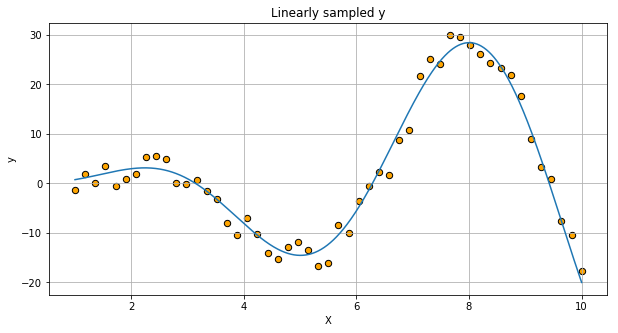

In [628]:
df.plot.scatter('X',y='y',title='Linearly sampled y',grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth))

### Import scikit-learn librares and prepare train/test splits

In [629]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

In [630]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

### Polynomial model with Ridge regularization (pipelined) with lineary spaced samples
** This is an advanced machine learning method which prevents over-fitting by penalizing high-valued coefficients i.e. keep them bounded **

Test score of model with degree 2: 0.03698549859390754

Test score of model with degree 3: 0.049215485495609945

Test score of model with degree 4: 0.7636504511477346

Test score of model with degree 5: 0.8187394381687227

Test score of model with degree 6: 0.8072820117303374

Test score of model with degree 7: 0.8281890357880801



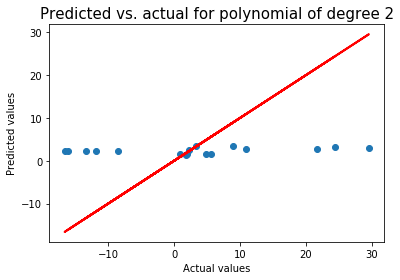

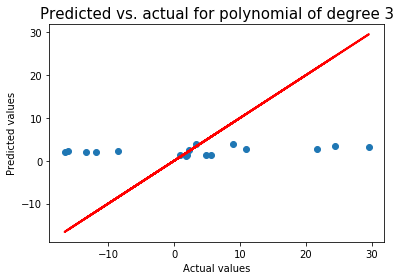

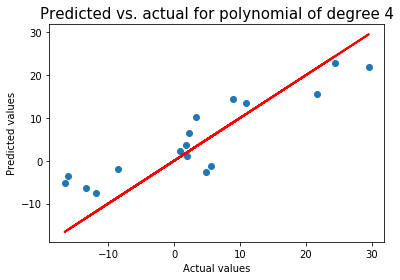

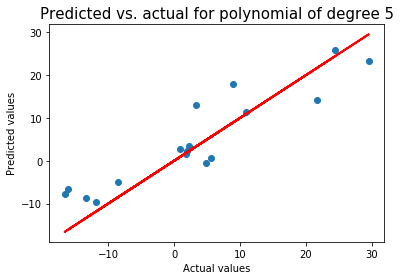

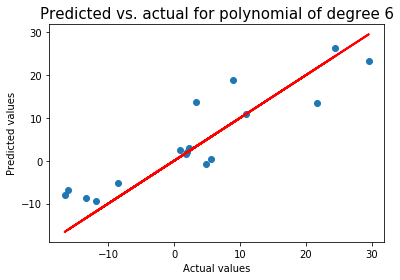

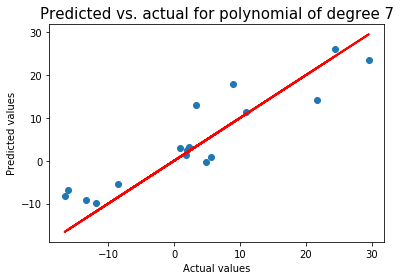

In [631]:
linear_sample_score = []
poly_degree = []
for degree in range(2,8):
    model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,normalize=True,cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
    model.fit(X_train, y_train)
    y_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
    test_score = model.score(X_test,y_test)
    linear_sample_score.append(test_score)
    poly_degree.append(degree)
    print("Test score of model with degree {}: {}\n".format(degree,test_score))
    
    #plt.figure()
    #plt.title("RMSE: {}".format(RMSE),fontsize=10)
    #plt.suptitle("Polynomial of degree {}".format(degree),fontsize=15)
    #plt.xlabel("X training values")
    #plt.ylabel("Fitted and training values")
    #plt.scatter(X_train,y_pred)
    #plt.scatter(X_train,y_train)
    
    plt.figure()
    plt.title("Predicted vs. actual for polynomial of degree {}".format(degree),fontsize=15)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.scatter(y_test,test_pred)
    plt.plot(y_test,y_test,'r',lw=2)

In [632]:
linear_sample_score

[0.03698549859390754,
 0.049215485495609945,
 0.76365045114773455,
 0.81873943816872274,
 0.80728201173033742,
 0.82818903578808012]

### Modeling with randomly sampled data set

In [633]:
X_train, X_test, y_train, y_test = train_test_split(df['X_sampled'], df['y_sampled'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

Test score of model with degree 2: -0.052174774148528336

Test score of model with degree 3: 0.28326220366412924

Test score of model with degree 4: 0.8254293209700883

Test score of model with degree 5: 0.9163770487687002

Test score of model with degree 6: 0.9157935248346764

Test score of model with degree 7: 0.9261532282281197



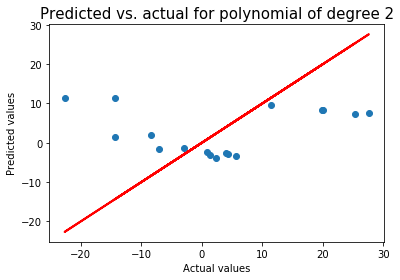

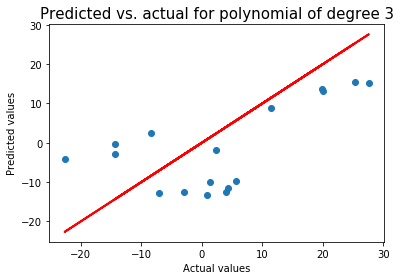

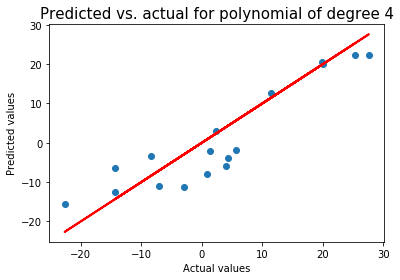

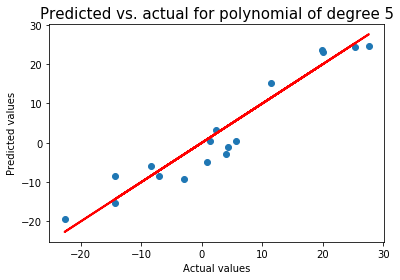

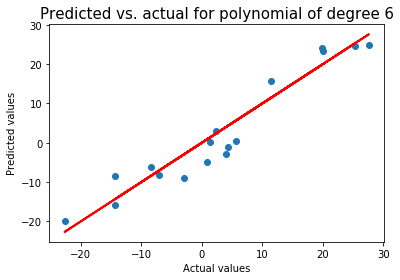

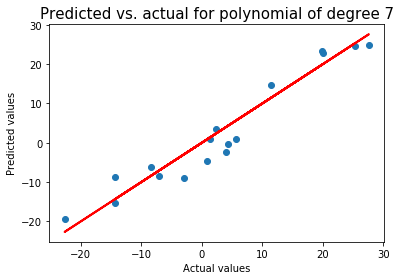

In [634]:
random_sample_score = []
poly_degree = []
for degree in range(2,8):
    model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,normalize=True,cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
    model.fit(X_train, y_train)
    y_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
    test_score = model.score(X_test,y_test)
    random_sample_score.append(test_score)
    poly_degree.append(degree)
    
    print("Test score of model with degree {}: {}\n".format(degree,test_score))
    
    #plt.figure()
    #plt.title("RMSE: {}".format(RMSE),fontsize=10)
    #plt.suptitle("Polynomial of degree {}".format(degree),fontsize=15)
    #plt.xlabel("X training values")
    #plt.ylabel("Fitted and training values")
    #plt.scatter(X_train,y_pred)
    #plt.scatter(X_train,y_train)
    
    plt.figure()
    plt.title("Predicted vs. actual for polynomial of degree {}".format(degree),fontsize=15)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.scatter(y_test,test_pred)
    plt.plot(y_test,y_test,'r',lw=2)

In [635]:
random_sample_score

[-0.052174774148528336,
 0.28326220366412924,
 0.82542932097008825,
 0.91637704876870019,
 0.91579352483467635,
 0.92615322822811974]

In [636]:
df_score = pd.DataFrame(data={'degree':[d for d in range(2,8)],'Linear sample score':linear_sample_score,
                              'Random sample score':random_sample_score})
df_score

,Linear sample score,Random sample score,degree
0,0.036985,-0.052175,2
1,0.049215,0.283262,3
2,0.763650,0.825429,4
3,0.818739,0.916377,5
4,0.807282,0.915794,6
5,0.828189,0.926153,7
